# Title: ChicagoBoothCAAI
# Author: Daniel Cohen, UC Berkeley
# Date: 11/17/20
# Description: Analysis task for UChicago Booth School of Business CAAI Predoctoral Fellowship

### Setup

In [208]:
# load important libraries 

import numpy as np               # numerical utility functions
import pandas as pd              # data storage and manipulation
from scipy.io import loadmat     # to read in imdb.mat, wiki.mat
import datetime as dt            # for converting Matlab serial to date
import matplotlib.pyplot as plt  # plotting infrastructure
import seaborn as sns            # clean visualizations


### Load and extract data

In [216]:
# read in IMDB data

imdb_mat = loadmat('imdb.mat')
imdb = imdb_mat['imdb'][0][0]

# read in Wiki data

wiki_mat = loadmat('wiki.mat')
wiki = wiki_mat['wiki'][0][0]


In [237]:
# extract dates of birth

dob_imdb_matlab_serial = imdb[0][0]
dob_imdb = (pd.Series(dob_imdb_matlab_serial)
            .apply(dt.date.fromordinal)
            .apply(lambda x: x.year)
            .astype(int)
            .rename('dob'))

dob_wiki_matlab_serial = wiki[0][0]
dob_wiki = (pd.Series(dob_wiki_matlab_serial)
            .apply(dt.date.fromordinal)
            .apply(lambda x: x.year)
            .astype(int)
            .rename('dob'))



In [238]:
# extract years of photo

yr_of_photo_imdb = (pd.Series(imdb[1][0])
                    .astype(int)
                    .rename('yr_of_photo'))

yr_of_photo_wiki = (pd.Series(wiki[1][0])
                    .astype(int)
                    .rename('yr_of_photo'))


In [239]:
# extract genders 

genders_imdb = (pd.Series(imdb[3][0])
                .apply(lambda x: 'Male' if x == 1 else 'Female')
                .rename('gender'))

genders_wiki = (pd.Series(wiki[3][0])
                .apply(lambda x: 'Male' if x == 1 else 'Female')
                .rename('gender'))


### Combine, analyze, and clean data

In [240]:
# combine together into pandas DataFrame

imdb_df = (pd.DataFrame(dob_imdb).merge(pd.DataFrame(yr_of_photo_imdb), left_index=True, right_index=True)
           .merge(pd.DataFrame(genders_imdb), left_index=True, right_index=True))

wiki_df = (pd.DataFrame(dob_wiki).merge(pd.DataFrame(yr_of_photo_wiki), left_index=True, right_index=True)
           .merge(pd.DataFrame(genders_wiki), left_index=True, right_index=True))

wiki_imdb_df = pd.concat([imdb_df, wiki_df])


In [241]:
# create column for age

wiki_imdb_df['age'] = wiki_imdb_df['yr_of_photo'] - wiki_imdb_df['dob']


In [242]:
# remove observations where date of birth = 1;
# these observations are clearly coded for removal

wiki_imdb_df = wiki_imdb_df.loc[wiki_imdb_df['dob'] != 1]


In [243]:
# remove observations with negative ages (i.e. date of birth after time photo taken)

wiki_imdb_df = wiki_imdb_df.loc[wiki_imdb_df['age'] > 0]


In [244]:
# remove outliers with age greater than 120, 
# which I'm using as a generous upper bound on age.

wiki_imdb_df = wiki_imdb_df.loc[wiki_imdb_df['age'] < 121]


### Answering questions from document

In [245]:
# number in specific age bin

num_15_25 = len(wiki_imdb_df.loc[(wiki_imdb_df['age'] >= 15) & (wiki_imdb_df['age'] < 25)])


In [246]:
print((f"The size of the bucket '15 to 25', assuming the lower bound is inclusive \n" 
       f"and the upper bound is exclusive, is {num_15_25}"))


The size of the bucket '15 to 25', assuming the lower bound is inclusive 
and the upper bound is exclusive, is 88494


In [247]:
# percent of specific gender and age 

percent_30M = (len(wiki_imdb_df.loc[(wiki_imdb_df['gender'] == 'Male') & 
                                    (wiki_imdb_df['age'] == 30)]) / len(wiki_imdb_df)) * 100


In [248]:
print(f"The percentage of the population that is '30 year-old males' is {np.round(percent_30M, 2)}%")


The percentage of the population that is '30 year-old males' is 1.94%


### Visualization

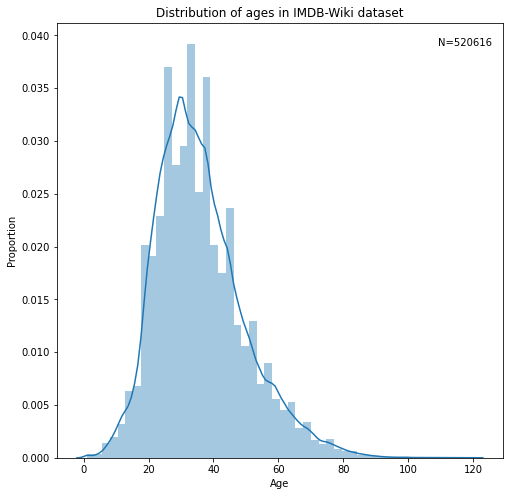

In [250]:
# plot ages 

fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(wiki_imdb_df['age'], ax=ax);
plt.title("Distribution of ages in IMDB-Wiki dataset");
plt.xlabel('Age');
plt.ylabel('Proportion');
plt.text(1.05 * max(wiki_imdb_df['age']), 0.039, 
         f"N={len(wiki_imdb_df)}", ha='right');


In [255]:
# save image

proj_dir = "/Users/danielcohen/Documents/RA Applications/applications/mullainathan uchicago"
fig.savefig(f"{proj_dir}/age_dist.png")